In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from collections import defaultdict

In [2]:
data = pd.read_csv('data/data.csv').drop('Unnamed: 0', axis = 1)

In [3]:
data['revenue'] = np.where(data['purchase'] == False, 0, 15)
data.replace({True: 1, False: 0}, inplace = True)
data.head()

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
0,2697588,2021-01-01 08:00:00,facebook,0,0,Female,Gen Alpha,0
1,2697588,2021-01-02 08:00:00,email,0,0,Female,Gen Alpha,0
2,2697588,2021-01-02 09:20:00,search,0,0,Female,Gen Alpha,0
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
4,2697588,2021-01-02 12:00:00,facebook,0,0,Female,Gen Alpha,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822361 entries, 0 to 6822360
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   uid           int64 
 1   timestamp     object
 2   channel       object
 3   clickthrough  bool  
 4   purchase      bool  
 5   gender        object
 6   age           object
dtypes: bool(2), int64(1), object(4)
memory usage: 273.3+ MB


In [ ]:
heat = sns.heatmap(data[['channel', 'clickthrough','purchase']]).corr()
heat

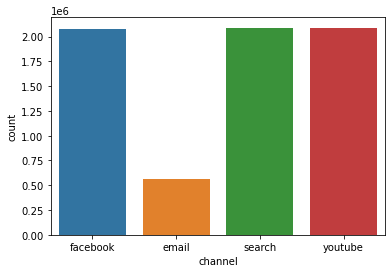

In [9]:
sns.countplot(x = 'channel', data = data)
plt.show()

Text(0, 0.5, 'Purchases')

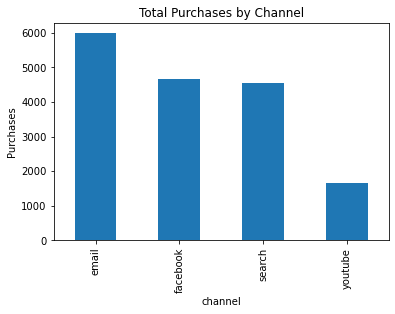

In [12]:
channels = data.groupby('channel')['purchase'].sum()
channels.plot.bar()
plt.title('Total Purchases by Channel')
plt.ylabel('Purchases')

Text(0.5, 1.0, 'Total Visits Per Channel')

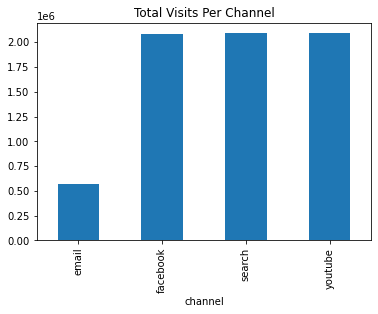

In [14]:
visits = data.groupby('channel')['timestamp'].count()
visits.plot.bar()
plt.title('Total Visits Per Channel')

<AxesSubplot:ylabel='gender,channel'>

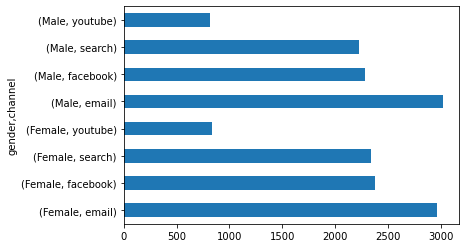

In [13]:
gender = data.groupby(['gender', 'channel'])['purchase'].sum()
gender.plot(kind = 'barh')

In [22]:
data.groupby(['gender', 'age', 'channel'])['revenue'].sum()

gender  age        channel 
Female  Boomer     email        4170
                   facebook     3780
                   search       3600
                   youtube      1365
        Gen Alpha  email       32385
                   facebook    25500
                   search      24510
                   youtube      8625
        Gen Z      email        3870
                   facebook     2970
                   search       3585
                   youtube      1215
        Millenial  email        4080
                   facebook     3420
                   search       3330
                   youtube      1275
Male    Boomer     email        4305
                   facebook     3075
                   search       3510
                   youtube      1155
        Gen Alpha  email       31725
                   facebook    24255
                   search      22740
                   youtube      8520
        Gen Z      email        4425
                   facebook     3015
          

In [29]:
conversions = data.groupby('channel')['purchase'].sum()
conversions

channel
email       5982
facebook    4662
search      4561
youtube     1650
Name: purchase, dtype: int64

<AxesSubplot:xlabel='gender,channel'>

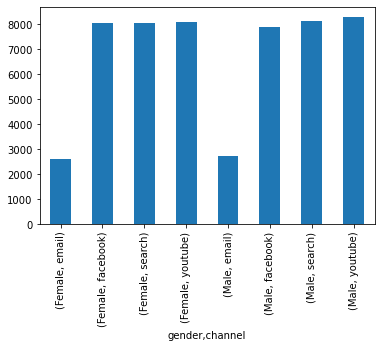

In [32]:
clickthrough = data.groupby(['gender', 'channel'])['clickthrough'].sum()

clickthrough.plot.bar()

In [26]:
data[(data['uid'] == 2697588) & (data['purchase'] == 1)]

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
366,2697588,2021-03-21 17:50:46,search,0,1,Female,Gen Alpha,15


In [39]:
pur = data[data['purchase']==1].groupby('channel')['timestamp'].mean()

pur

DataError: No numeric types to aggregate

Text(0.5, 1.0, 'Channel Clickthrough by Gender')

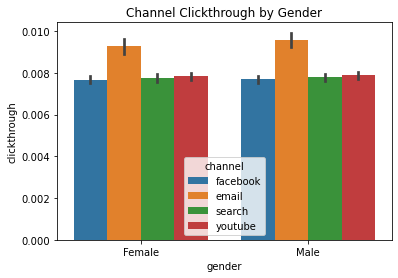

In [15]:
ax = sns.barplot(x = data['gender'], y = data['clickthrough'], hue = data['channel'])
ax.set_title('Channel Clickthrough by Gender')

Text(0.5, 1.0, 'Channel Purchase by Gender')

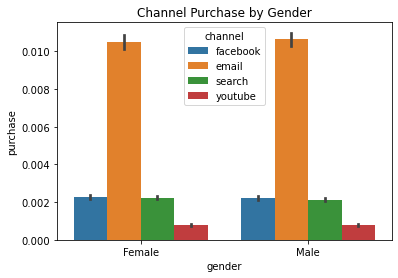

In [16]:
ax = sns.barplot(x = data['gender'], y = data['purchase'], hue = data['channel'])
ax.set_title('Channel Purchase by Gender')

In [82]:
test = data[data['uid'] == 1000276]
test

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
5384911,1000276,2021-01-01 08:00:00,facebook,0,0,Male,Gen Alpha,0
5384912,1000276,2021-01-01 08:32:00,facebook,0,0,Male,Gen Alpha,0
5384913,1000276,2021-01-01 09:04:00,facebook,0,0,Male,Gen Alpha,0
5384914,1000276,2021-01-01 09:36:00,facebook,0,0,Male,Gen Alpha,0
5384915,1000276,2021-01-01 10:08:00,search,0,0,Male,Gen Alpha,0
...,...,...,...,...,...,...,...,...
5385892,1000276,2021-04-10 20:00:00,facebook,0,0,Male,Gen Alpha,0
5385893,1000276,2021-04-10 20:40:00,facebook,0,0,Male,Gen Alpha,0
5385894,1000276,2021-04-10 21:20:00,facebook,0,0,Male,Gen Alpha,0
5385895,1000276,2021-04-10 22:00:00,email,0,0,Male,Gen Alpha,0


In [111]:
#trying to note down the marketing path until a conversion
def marketing_path(uid, data): 
    user = data[data['uid'] == uid] 
    path = []
    for channel, buy in zip(user['channel'], user['purchase']):
        if buy == 0 and channel not in path:
            path.append(channel)
        elif buy == 1:
            path.append(channel)
            break
    return path
            
marketing_path(2697588, data)

['facebook', 'email', 'search', 'search']

In [133]:
path = pd.DataFrame(data['uid'].unique(), columns = ['uid'])
path['channel'] = hehe['uid'].apply(lambda row: marketing_path(row,data))

In [134]:
path

,uid,channel
0,2697588,"[facebook, email, search, search]"
1,9569845,"[email, facebook, youtube, search]"
2,4983829,"[search, facebook, email, youtube, email]"
3,4183239,"[facebook, email, search, youtube, search]"
4,4984417,"[youtube, facebook, search, email, youtube]"
...,...,...
9988,5466211,"[facebook, search, youtube, search]"
9989,9024244,"[facebook, email, search, youtube]"
9990,9018528,"[facebook, youtube, search, email]"
9991,2277899,"[email, facebook, youtube, search, search]"


In [73]:
#am easier way to follow the marketing path of a customer
# path = data.groupby('uid')['channel'].aggregate(lambda x: x.unique().tolist()).reset_index()


In [74]:
#removing duplicated UID's and keeping purchase data
last = data.drop_duplicates('uid', keep = 'last')[['uid','purchase','gender','age']]
last

,uid,purchase,gender,age
481,2697588,0,Female,Gen Alpha
1006,9569845,0,Female,Gen Alpha
1343,4983829,0,Female,Gen Alpha
2223,4183239,0,Male,Gen Alpha
3073,4984417,0,Male,Gen Z
...,...,...,...,...
6819758,5466211,0,Female,Gen Alpha
6819982,9024244,0,Male,Gen Alpha
6820860,9018528,0,Female,Gen Alpha
6821661,2277899,0,Female,Gen Alpha


In [135]:
path = pd.merge(path, last, how = "left", on = 'uid')
path

,uid,channel,purchase,gender,age
0,2697588,"[facebook, email, search, search]",0,Female,Gen Alpha
1,9569845,"[email, facebook, youtube, search]",0,Female,Gen Alpha
2,4983829,"[search, facebook, email, youtube, email]",0,Female,Gen Alpha
3,4183239,"[facebook, email, search, youtube, search]",0,Male,Gen Alpha
4,4984417,"[youtube, facebook, search, email, youtube]",0,Male,Gen Z
...,...,...,...,...,...
9988,5466211,"[facebook, search, youtube, search]",0,Female,Gen Alpha
9989,9024244,"[facebook, email, search, youtube]",0,Male,Gen Alpha
9990,9018528,"[facebook, youtube, search, email]",0,Female,Gen Alpha
9991,2277899,"[email, facebook, youtube, search, search]",0,Female,Gen Alpha


In [138]:
path[path['purchase'] == 1].count()

uid         37
channel     37
purchase    37
dtype: int64

In [136]:
con = []
for row in path['purchase']:
    if row == 1:
        con.append(['conversion'])
    else:
        con.append(['end'])
        
con.count(['conversion'])

37

In [137]:
path['conversion'] = con
path['channel'] = path['channel'] + path['conversion']
path

,uid,channel,purchase,gender,age,conversion
0,2697588,"[facebook, email, search, search, end]",0,Female,Gen Alpha,[end]
1,9569845,"[email, facebook, youtube, search, end]",0,Female,Gen Alpha,[end]
2,4983829,"[search, facebook, email, youtube, email, end]",0,Female,Gen Alpha,[end]
3,4183239,"[facebook, email, search, youtube, search, end]",0,Male,Gen Alpha,[end]
4,4984417,"[youtube, facebook, search, email, youtube, end]",0,Male,Gen Z,[end]
...,...,...,...,...,...,...
9988,5466211,"[facebook, search, youtube, search, end]",0,Female,Gen Alpha,[end]
9989,9024244,"[facebook, email, search, youtube, end]",0,Male,Gen Alpha,[end]
9990,9018528,"[facebook, youtube, search, email, end]",0,Female,Gen Alpha,[end]
9991,2277899,"[email, facebook, youtube, search, search, end]",0,Female,Gen Alpha,[end]


In [138]:
path['test'] = path['channel'].map(lambda x: x.insert(0,'start'))

path

,uid,channel,purchase,gender,age,conversion,test
0,2697588,"[start, facebook, email, search, search, end]",0,Female,Gen Alpha,[end],None
1,9569845,"[start, email, facebook, youtube, search, end]",0,Female,Gen Alpha,[end],None
2,4983829,"[start, search, facebook, email, youtube, emai...",0,Female,Gen Alpha,[end],None
3,4183239,"[start, facebook, email, search, youtube, sear...",0,Male,Gen Alpha,[end],None
4,4984417,"[start, youtube, facebook, search, email, yout...",0,Male,Gen Z,[end],None
...,...,...,...,...,...,...,...
9988,5466211,"[start, facebook, search, youtube, search, end]",0,Female,Gen Alpha,[end],None
9989,9024244,"[start, facebook, email, search, youtube, end]",0,Male,Gen Alpha,[end],None
9990,9018528,"[start, facebook, youtube, search, email, end]",0,Female,Gen Alpha,[end],None
9991,2277899,"[start, email, facebook, youtube, search, sear...",0,Female,Gen Alpha,[end],None


In [139]:
path = path[['uid','channel','gender','age']]
#1105013
path

,uid,channel,gender,age
0,2697588,"[start, facebook, email, search, search, end]",Female,Gen Alpha
1,9569845,"[start, email, facebook, youtube, search, end]",Female,Gen Alpha
2,4983829,"[start, search, facebook, email, youtube, emai...",Female,Gen Alpha
3,4183239,"[start, facebook, email, search, youtube, sear...",Male,Gen Alpha
4,4984417,"[start, youtube, facebook, search, email, yout...",Male,Gen Z
...,...,...,...,...
9988,5466211,"[start, facebook, search, youtube, search, end]",Female,Gen Alpha
9989,9024244,"[start, facebook, email, search, youtube, end]",Male,Gen Alpha
9990,9018528,"[start, facebook, youtube, search, email, end]",Female,Gen Alpha
9991,2277899,"[start, email, facebook, youtube, search, sear...",Female,Gen Alpha


In [161]:
num_of_paths = path['channel']
conversiontotal = sum(path.count('conversion') for path in num_of_paths.tolist())
def base_rate(df):
    total_conversion = sum(path.count('conversion') for path in df.tolist())
    base_rate = total_conversion/len(num_of_paths)
    return base_rate
    
baserate = base_rate(num_of_paths)
baserate


0.003702591814269989

In [141]:
#counting how many times users went from one channel/state to another

def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['conversion', 'end']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(num_of_paths)
trans_states

{'facebook>facebook': 250,
 'facebook>email': 2958,
 'facebook>search': 2977,
 'facebook>start': 0,
 'facebook>conversion': 9,
 'facebook>youtube': 2601,
 'facebook>end': 2637,
 'email>facebook': 2967,
 'email>email': 402,
 'email>search': 2856,
 'email>start': 0,
 'email>conversion': 17,
 'email>youtube': 2539,
 'email>end': 3166,
 'search>facebook': 2883,
 'search>email': 3063,
 'search>search': 228,
 'search>start': 0,
 'search>conversion': 8,
 'search>youtube': 2620,
 'search>end': 2659,
 'start>facebook': 2478,
 'start>email': 2428,
 'start>search': 2563,
 'start>start': 0,
 'start>conversion': 0,
 'start>youtube': 2524,
 'start>end': 0,
 'conversion>facebook': 0,
 'conversion>email': 0,
 'conversion>search': 0,
 'conversion>start': 0,
 'conversion>conversion': 0,
 'conversion>youtube': 0,
 'conversion>end': 0,
 'youtube>facebook': 2854,
 'youtube>email': 3096,
 'youtube>search': 2837,
 'youtube>start': 0,
 'youtube>conversion': 3,
 'youtube>youtube': 71,
 'youtube>end': 1494,
 'e

In [142]:
#calculating the transition probability

def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in num_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['conversion', 'end']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)
trans_prob

defaultdict(dict,
            {'facebook>facebook': 0.021868439468159553,
             'facebook>email': 0.2587473757872638,
             'facebook>search': 0.2604093771868439,
             'facebook>conversion': 0.0007872638208537439,
             'facebook>youtube': 0.22751924422673198,
             'facebook>end': 0.23066829951014695,
             'email>facebook': 0.2483468653218381,
             'email>email': 0.03364861471499121,
             'email>search': 0.23905582991545996,
             'email>conversion': 0.0014229513685444044,
             'email>youtube': 0.21252197204319076,
             'email>end': 0.2650037666359756,
             'search>facebook': 0.2515487304772707,
             'search>email': 0.26725416630311494,
             'search>search': 0.01989355204606928,
             'search>conversion': 0.0006980193700375186,
             'search>youtube': 0.22860134368728732,
             'search>end': 0.23200418811622023,
             'start>facebook': 0.24797358150705

In [143]:
#creating a matrix to easily view the probabilities between different stages. 

def transition_matrix(num_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in num_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['conversion', 'end'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(num_of_paths, trans_prob)
trans_matrix

,facebook,email,search,start,conversion,youtube,end
facebook,0.021868,0.258747,0.260409,0.0,0.000787,0.227519,0.230668
email,0.248347,0.033649,0.239056,0.0,0.001423,0.212522,0.265004
search,0.251549,0.267254,0.019894,0.0,0.000698,0.228601,0.232004
start,0.247974,0.242970,0.256480,0.0,0.000000,0.252577,0.000000
conversion,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
youtube,0.275616,0.298986,0.273974,0.0,0.000290,0.006857,0.144278
end,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000


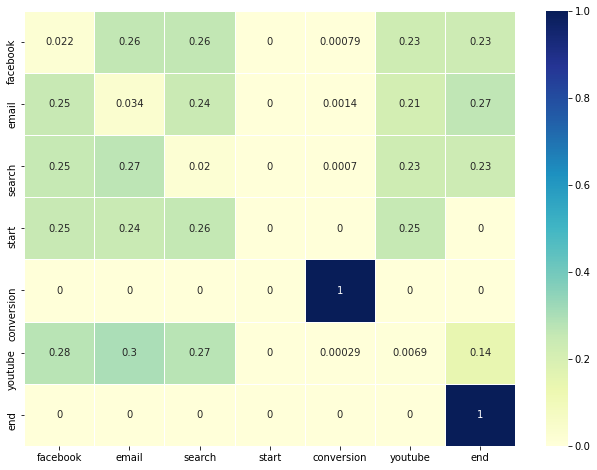

In [144]:
def channel_heatmap(trans_matrix):
    fig, ax = plt.subplots(figsize = (11,8))
    ax = sns.heatmap(trans_matrix, annot = True, cmap="YlGnBu", linewidths= 1, linecolor = 'white')
    
channel_heatmap(trans_matrix)

In [91]:
def gender_heatmap(df, gender):
    focus = df[df['gender'] == gender]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    return channel_heatmap(t_matrix)

In [145]:
gender_heatmap(path, 'Male')

NameError: name 'gender_heatmap' is not defined

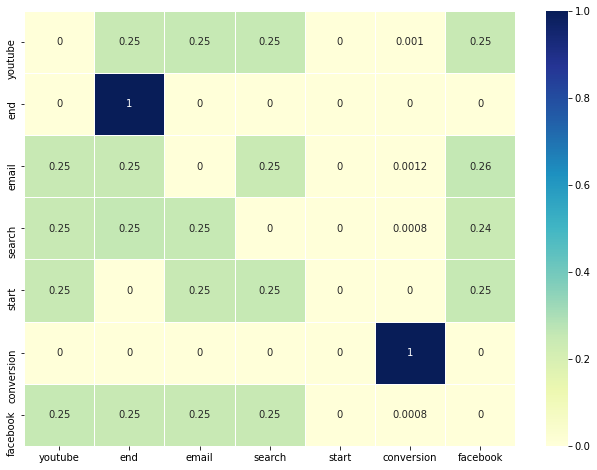

In [93]:
gender_heatmap(path, 'Female')

In [147]:
def age_heatmap(df, age):
    focus = df[df['age'] == age]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    return channel_heatmap(t_matrix)

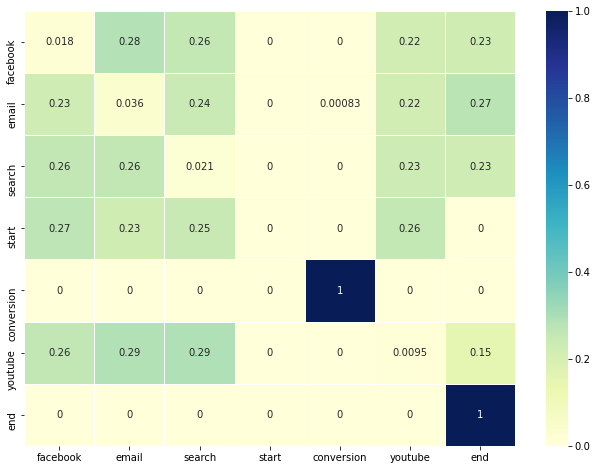

In [148]:
age_heatmap(path, 'Boomer')

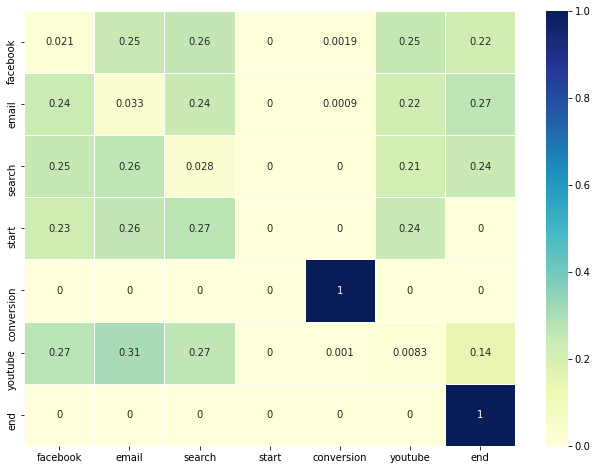

In [149]:
age_heatmap(path, 'Gen Z')

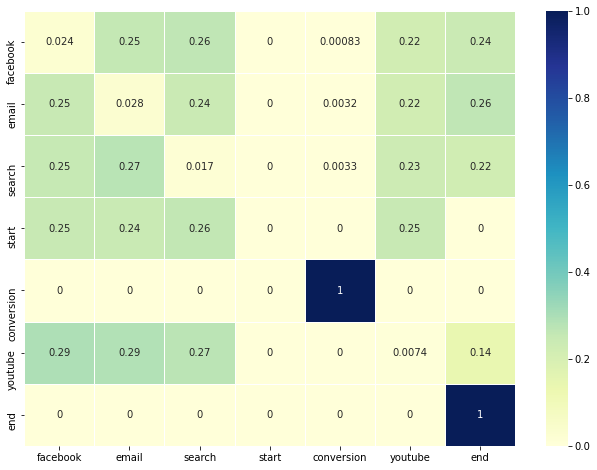

In [150]:
age_heatmap(path, 'Millenial')

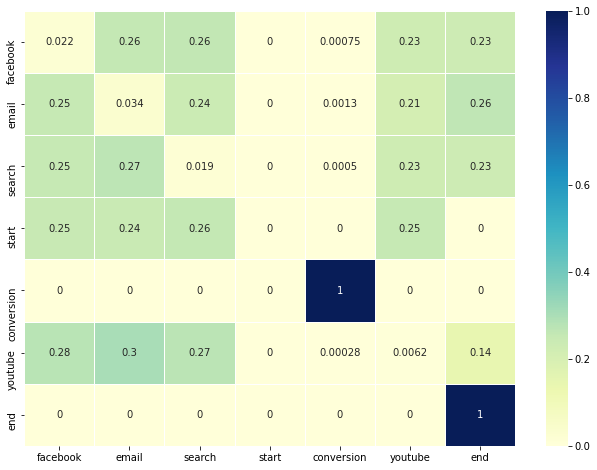

In [151]:
age_heatmap(path, 'Gen Alpha')

In [157]:
#assessing how much removing each channel will impact our conversion rate.

def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['start',
                                                                     'end',
                                                                     'conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['end'] = null_pct
            removal_df.loc['end']['end'] = 1.0

        removal_to_conv = removal_df[
            ['end', 'conversion']].drop(['end', 'conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['end', 'conversion'], axis=1).drop(['end', 'conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, baserate)
removal_effects_dict

{'facebook': 0.6478716770589814,
 'email': 0.7443736531551921,
 'search': 0.6386498051638512,
 'youtube': 0.579405150016908}

In [162]:
def chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: round((v / re_sum) * total_conversions,2) for k, v in removal_effects.items()}


attributions = chain_allocations(removal_effects_dict, conversiontotal)
attributions

{'facebook': 9.18, 'email': 10.55, 'search': 9.05, 'youtube': 8.21}

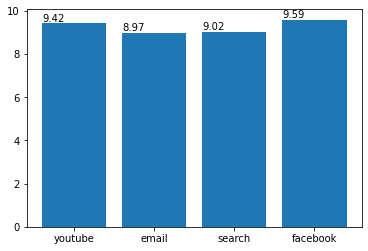

In [155]:
# f, ax = plt.subplots(figsize = (7,8))
y = list(attributions.values())
x = list(attributions.keys())
ax = plt.bar(x = x, height=y)
for bar in ax:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .1, yval, ha = 'left')


In [163]:
#Attribution levels for females

def gender_attribution(df, gender):
    focus = df[df['gender'] == gender]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    return attribution

gender_attribution(path, 'Female')

{'facebook': 5.69, 'email': 7.13, 'search': 4.96, 'youtube': 1.22}

In [164]:
gender_attribution(path, 'Male')

{'facebook': 3.27, 'email': 7.68, 'search': 3.46, 'youtube': 3.59}

(<BarContainer object of 4 artists>,
 {'facebook': -6.379258675581404,
  'email': -4.9675029370962145,
  'search': -3.240279577452662,
  'youtube': -7.7635660940443785})

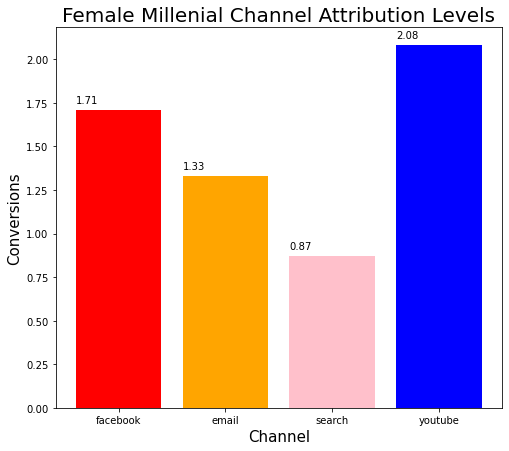

In [167]:
def demographic_attribution(df, age, gender):
    focus = df[(df['age'] == age) & (df['gender'] == gender)]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    
    plt.figure(figsize = (8,7))
    x = list(attribution.keys())
    y = list(attribution.values())
    ax = plt.bar(x = x, height=y, color = ['red', 'orange', 'pink', 'blue'])
    for bar in ax:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .04, yval, ha = 'left')
    plt.ylabel('Conversions', size = 15)
    plt.xlabel('Channel', size = 15)
    plt.title(f'{gender} {age} Channel Attribution Levels', size = 20)
    return ax, removal

demographic_attribution(path, 'Millenial', 'Female')

(<BarContainer object of 4 artists>,
 {'facebook': 0.5100535594978525,
  'email': 0.6494419753359193,
  'search': 0.45577554824398914,
  'youtube': 0.4056472049197166})

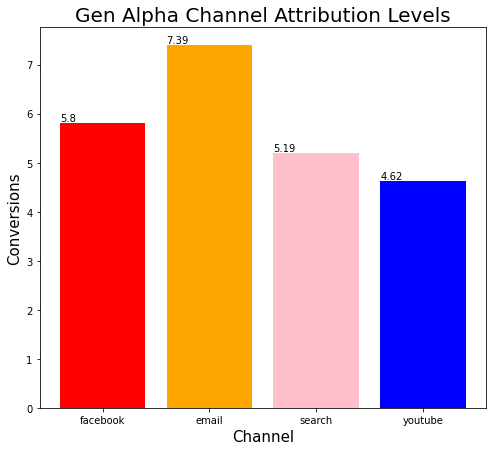

In [166]:
def age_attribution(df, age):
    focus = df[(df['age'] == age)]
    path = focus[['uid','channel']]
    num_paths = path['channel']
    total_conversion = sum(path.count('conversion') for path in num_paths.tolist())
    base_r = base_rate(num_paths)
    trans_states = transition_states(num_paths)
    trans_prob = transition_prob(trans_states)
    t_matrix = transition_matrix(num_paths, trans_prob)
    removal = removal_effects(t_matrix, base_r)
    attribution = chain_allocations(removal, total_conversion)
    
    plt.figure(figsize = (8,7))
    x = list(attribution.keys())
    y = list(attribution.values())
    ax = plt.bar(x = x, height=y, color = ['red', 'orange', 'pink', 'blue'])
    for bar in ax:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .04, yval, ha = 'left')
    plt.ylabel('Conversions', size = 15)
    plt.xlabel('Channel', size = 15)
    plt.title(f'{age} Channel Attribution Levels', size = 20)
    return ax, removal

age_attribution(path, 'Gen Alpha')

In [19]:
impressions = data.groupby(['gender','age','uid','channel']).agg({'timestamp':'count',
                                                       'clickthrough': 'sum',
                                                       'purchase': 'sum'})

impressions

timestamp  clickthrough  purchase
gender age       uid     channel                                    
Female Boomer    1009283 email            47             3         0
                         facebook        102             2         0
                         search          241             2         0
                         youtube         309             8         0
                 1040848 email            83             0         2
...                                      ...           ...       ...
Male   Millenial 9952505 youtube         176             3         0
                 9953503 email            71             2         2
                         facebook         56             0         0
                         search          345             2         1
                         youtube         117             2         0

[39800 rows x 3 columns]

In [20]:
impressions['CTR'] = impressions['clickthrough']/impressions['timestamp']
impressions['conversion_rate'] = impressions['purchase']/impressions['timestamp']

impressions

timestamp  clickthrough  purchase  \
gender age       uid     channel                                       
Female Boomer    1009283 email            47             3         0   
                         facebook        102             2         0   
                         search          241             2         0   
                         youtube         309             8         0   
                 1040848 email            83             0         2   
...                                      ...           ...       ...   
Male   Millenial 9952505 youtube         176             3         0   
                 9953503 email            71             2         2   
                         facebook         56             0         0   
                         search          345             2         1   
                         youtube         117             2         0   

                                        CTR  conversion_rate  
gender age       uid     channel                              
Female Boomer    1009283 email     0.063830         0.000000  
                         facebook  0.019608         0.000000  
                         search    0.008299         0.000000  
                         youtube   0.025890         0.000000  
                 1040848 email     0.000000         0.024096  
...                                     ...              ...  
Male   Millenial 9952505 youtube   0.017045         0.000000  
                 9953503 email     0.028169         0.028169  
                         facebook  0.000000         0.000000  
                         search    0.005797         0.002899  
                         youtube   0.017094         0.000000  

[39800 rows x 5 columns]

<AxesSubplot:xlabel='timestamp', ylabel='clickthrough'>

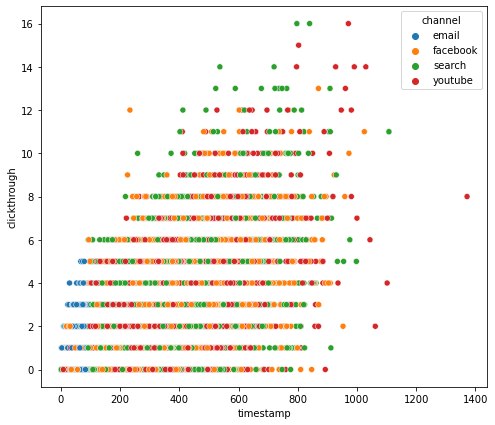

In [57]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'clickthrough', hue = 'channel')

<AxesSubplot:xlabel='timestamp', ylabel='purchase'>

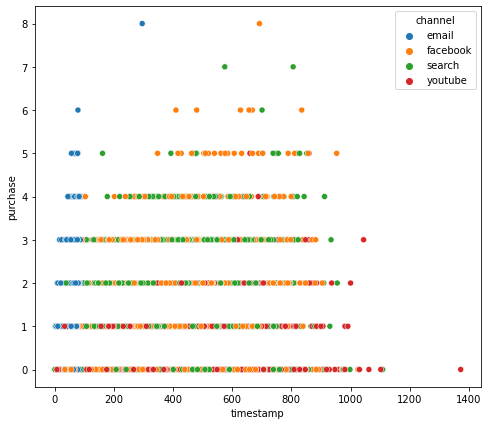

In [58]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'purchase', hue = 'channel')

<AxesSubplot:xlabel='timestamp', ylabel='purchase'>

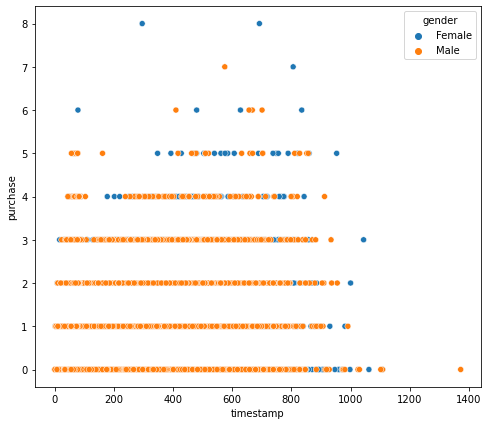

In [59]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'purchase', hue = 'gender')

<AxesSubplot:xlabel='timestamp', ylabel='clickthrough'>

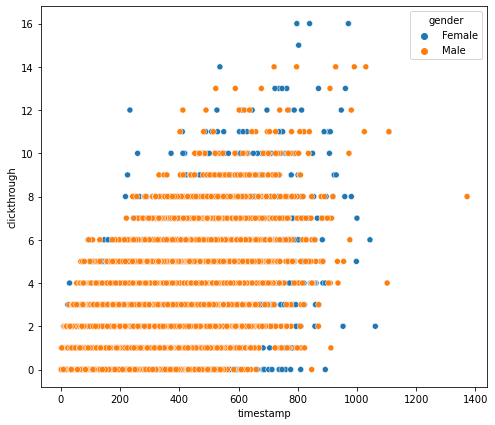

In [60]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'clickthrough', hue = 'gender')

<AxesSubplot:xlabel='timestamp', ylabel='clickthrough'>

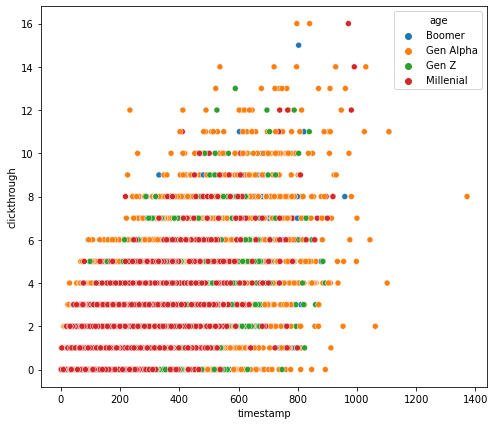

In [61]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'clickthrough', hue = 'age')

<AxesSubplot:xlabel='timestamp', ylabel='purchase'>

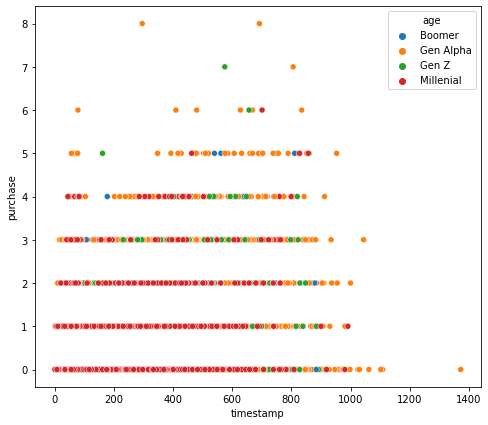

In [62]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.scatterplot(ax = ax, data = impressions, x = 'timestamp', y = 'purchase', hue = 'age')